# Project 1

Jupyter Notebook can also be found at http://salcorpenterprise.com/dsi-project-one/

Blog post can be found at http://salcorpenterprise.com/sat-and-act-participation-by-state/

## Step 1: Load the data and perform basic operations.

##### 1. Load the data in using pandas.

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
from matplotlib import pyplot as plt
import scipy.stats as stats

%matplotlib inline

In [2]:
# Loading each data with sat representing data from SAT scores nationally for 2017 and act doing
# the same for ACT scores nationally

sat = pd.read_csv('../data/sat.csv')
act = pd.read_csv('../data/act.csv')

##### 2. Print the first ten rows of each dataframe.

In [3]:
#  The following code will show the first 10 rows of SAT then the next field does the same for ACT.

sat.head(10)

,Unnamed: 0,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,0,Alabama,5%,593,572,1165
1,1,Alaska,38%,547,533,1080
2,2,Arizona,30%,563,553,1116
3,3,Arkansas,3%,614,594,1208
4,4,California,53%,531,524,1055
5,5,Colorado,11%,606,595,1201
6,6,Connecticut,100%,530,512,1041
7,7,Delaware,100%,503,492,996
8,8,District of Columbia,100%,482,468,950
9,9,Florida,83%,520,497,1017


In [4]:
act.head(10)

,Unnamed: 0,State,Participation,English,Math,Reading,Science,Composite
0,0,National,60%,20.3,20.7,21.4,21.0,21.0
1,1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,5,California,31%,22.5,22.7,23.1,22.2,22.8
6,6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


##### 3. Describe in words what each variable (column) is.

In [5]:
# For the SAT table, columns are as follows:
    # State is individual states around the U.S.
    # Participation is Participation rate for the SAT
    # Evidence Based Reading and Writing is score for Reading and Writing
    # Math is the score for Math
    # Total is the R&W score plus the Math Score

In [6]:
# For the ACT table, columns are as follows:
    # State is individual states around the U.S.
    # Participation is Participation rate for the ACT
    # English is the score for English
    # Math is the score for Math
    # Reading is the score for Reading
    # Composite is the average of Math, Reading, and Science

##### 4. Does the data look complete? Are there any obvious issues with the observations?

In [7]:
#  Data does look complete with one glaring missing item.  ACT table has a row with National Data, while SAT does not
sat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 6 columns):
Unnamed: 0                            51 non-null int64
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(4), object(2)
memory usage: 2.5+ KB


In [8]:
act.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 8 columns):
Unnamed: 0       52 non-null int64
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null float64
dtypes: float64(5), int64(1), object(2)
memory usage: 3.3+ KB


##### 5. Print the types of each column.

In [9]:
# dtypes helps show what type of data is embedded in each column of the data frame: integer, float, object, etc.

sat.dtypes

Unnamed: 0                             int64
State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [10]:
act.dtypes

Unnamed: 0         int64
State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

##### 6. Do any types need to be reassigned? If so, go ahead and do it.

In [11]:
# Participation shows as an object and needs to be reassigned to a float as seen below.

sat['Participation'] = sat['Participation'].str.rstrip('%').astype('float') / 100.0  #.rstrip takes the percentage symbol out
act['Participation'] = act['Participation'].str.rstrip('%').astype('float') / 100.0

# Checking to make sure above worked.

sat.head(2)

,Unnamed: 0,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,0,Alabama,0.05,593,572,1165
1,1,Alaska,0.38,547,533,1080


##### 7. Create a dictionary for each column mapping the State to its respective value for that column. (For example, you should have three SAT dictionaries.)

In [12]:
#SAT Dictionaries using the zip command and list comprehension

sat_readandwrite = {k:v for (k,v) in zip(sat['State'],sat['Evidence-Based Reading and Writing'])}
sat_math = {k:v for (k,v) in zip(sat['State'], sat['Math'])}
sat_total = {k:v for (k,v) in zip(sat['State'], sat['Total'])} 

In [13]:
#ACT Dictionaries

act_english = {k:v for (k,v) in zip(act['State'], act['English'])}
act_math = {k:v for (k,v) in zip(act['State'], act['Math'])}
act_reading = {k:v for (k,v) in zip(act['State'], act['Reading'])}
act_science = {k:v for (k,v) in zip(act['State'], act['Science'])}
act_composite = {k:v for (k,v) in zip(act['State'], act['Composite'])}

##### 8. Create one dictionary where each key is the column name, and each value is an iterable (a list or a Pandas Series) of all the values in that column.

In [14]:
# Used to_dict to put each DataFrame into a Dictionary as described above.

sat_dict = sat.to_dict(orient='list')
act_dict = act.to_dict(orient='list')

##### 9. Merge the dataframes on the state column.

In [15]:
# For this we use pd.merge to merge both the SAT and ACT DataFrames using an inner join on the State column.

merge_data = pd.merge(sat, act, how='inner', on='State')
merge_data.dtypes

Unnamed: 0_x                            int64
State                                  object
Participation_x                       float64
Evidence-Based Reading and Writing      int64
Math_x                                  int64
Total                                   int64
Unnamed: 0_y                            int64
Participation_y                       float64
English                               float64
Math_y                                float64
Reading                               float64
Science                               float64
Composite                             float64
dtype: object

##### 10. Change the names of the columns so you can distinguish between the SAT columns and the ACT columns.

In [16]:
# For this we use .rename to change like columns to distinguish between SAT and ACT scores as well as make the columns
# more readable

new_columns = merge_data.rename(columns={'Participation_x':'SAT Participation', 'Math_x':'SAT Math', 
                           'Evidence-Based Reading and Writing':'SAT Read and Write',
                           'Participation_y':'ACT Participation','English':'ACT English',
                           'Math_y':'ACT Math', 'Reading':'ACT Reading', 'Science':'ACT Science',
                           'Composite':'ACT Composite'
                          })

# Merging also created the two "Unnamed" columns which we remove since they are unnecessary at this point.

clean_table = new_columns.drop(['Unnamed: 0_x', 'Unnamed: 0_y'], axis=1)
clean_table.head(2)  # to verify and view the new DataFrame, just the first two rows

,State,SAT Participation,SAT Read and Write,SAT Math,Total,ACT Participation,ACT English,ACT Math,ACT Reading,ACT Science,ACT Composite
0,Alabama,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,19.2
1,Alaska,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,19.8


##### 11. Print the minimum and maximum of each numeric column in the data frame.

In [17]:
# here we use .min and .max to get the minimum and maximum values for all of the columns in the new cleaned up
# and merged DataFrame.

print ('Minimum Values are \n', clean_table.min(axis=0, numeric_only=True))
print ('Maximum Values are \n', clean_table.max(axis=0, numeric_only=True))

Minimum Values are 
 SAT Participation       0.02
SAT Read and Write    482.00
SAT Math               52.00
Total                 950.00
ACT Participation       0.08
ACT English            16.30
ACT Math               18.00
ACT Reading            18.10
ACT Science             2.30
ACT Composite          17.80
dtype: float64
Maximum Values are 
 SAT Participation        1.0
SAT Read and Write     644.0
SAT Math               651.0
Total                 1295.0
ACT Participation        1.0
ACT English             25.5
ACT Math                25.3
ACT Reading             26.0
ACT Science             24.9
ACT Composite           25.5
dtype: float64


##### 12. Write a function using only list comprehensions, no loops, to compute standard deviation. Using this function, calculate the standard deviation of each numeric column in both data sets. Add these to a list called `sd`.

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

In [18]:
def stan_dev(df):
    return [ df[col].std() for col in 
            df.select_dtypes(include = ['float', 'int64']).columns.tolist()]

In [19]:
sd = stan_dev(clean_table)
sd

[0.35276632270013036,
 45.66690138768932,
 84.90911865855486,
 92.49481172519046,
 0.32140842015886834,
 2.35367713980303,
 1.9819894936505533,
 2.0672706264873146,
 3.182462975155452,
 2.020694891154341]

## Step 2: Manipulate the dataframe

##### 13. Turn the list `sd` into a new observation in your dataset.

In [21]:
### Make a dictionary that ‘lines up’ with the original df columns and has the STD values
### Pad the first two rows (index and state) with dummy values
#  52 is the column index (not the df index) for the inserted row
# totalSTDs is the newly inserted row ‘state’ label
df_data = {}
for i, j in zip(clean_table.columns, [52, 'TotalSTDs']+stan_dev(clean_table)):
   df_data[i] = j
print(df_data)

# show the to-be-appended totals row we’re gonna stick on the bottom of our original df
pd.DataFrame(data=df_data, index=[clean_table.index[-1] + 1])

# append the STD total row to the original df and assign to new df, ‘df_std’
df_std = clean_table.append(pd.DataFrame(data=df_data, index=[clean_table.index[-1] + 1]))

# get the columns of the std’d frame in the correct (orginal) order again
df_std = df_std[clean_table.columns.tolist()]

# finished product snippet
df_std.tail(3)

{'State': 52, 'SAT Participation': 'TotalSTDs', 'SAT Read and Write': 0.35276632270013036, 'SAT Math': 45.66690138768932, 'Total': 84.90911865855486, 'ACT Participation': 92.49481172519046, 'ACT English': 0.32140842015886834, 'ACT Math': 2.35367713980303, 'ACT Reading': 1.9819894936505533, 'ACT Science': 2.0672706264873146, 'ACT Composite': 3.182462975155452}


,State,SAT Participation,SAT Read and Write,SAT Math,Total,ACT Participation,ACT English,ACT Math,ACT Reading,ACT Science,ACT Composite
49,Wisconsin,0.03,642.000000,649.000000,1291.000000,1.000000,19.700000,20.400000,20.600000,20.900000,20.500000
50,Wyoming,0.03,626.000000,604.000000,1230.000000,1.000000,19.400000,19.800000,20.800000,20.600000,20.200000
51,52,TotalSTDs,0.352766,45.666901,84.909119,92.494812,0.321408,2.353677,1.981989,2.067271,3.182463


##### 14. Sort the dataframe by the values in a numeric column (e.g. observations descending by SAT participation rate)

In [22]:
# Here we use .sort_values to specifically sort based on Column input and whether we want it in ascending or descending order.

clean_table.sort_values('SAT Participation', ascending=False)

,State,SAT Participation,SAT Read and Write,SAT Math,Total,ACT Participation,ACT English,ACT Math,ACT Reading,ACT Science,ACT Composite
8,District of Columbia,1.00,482,468,950,0.32,24.4,23.5,24.9,23.5,24.2
22,Michigan,1.00,509,495,1005,0.29,24.1,23.7,24.5,23.8,24.1
6,Connecticut,1.00,530,512,1041,0.31,25.5,24.6,25.6,24.6,25.2
7,Delaware,1.00,503,492,996,0.18,24.1,23.4,24.8,23.6,24.1
29,New Hampshire,0.96,532,520,1052,0.18,25.4,25.1,26.0,24.9,25.5
19,Maine,0.95,513,499,1012,0.08,24.2,24.0,24.8,23.7,24.3
12,Idaho,0.93,513,493,1005,0.38,21.9,21.8,23.0,22.1,22.3
9,Florida,0.83,520,497,1017,0.73,19.0,19.4,21.0,19.4,19.8
21,Massachusetts,0.76,555,551,1107,0.29,25.4,25.3,25.9,24.7,25.4
39,Rhode Island,0.71,539,524,1062,0.21,24.0,23.3,24.7,23.4,24.0


##### 15. Use a boolean filter to display only observations with a score above a certain threshold (e.g. only states with a participation rate above 50%)

In [23]:
# Using a boolean to specifically show an inputted column (here SAT Participation) that has a value greater of 0.5 or 50%

clean_table[(clean_table)['SAT Participation'] >= 0.50]

,State,SAT Participation,SAT Read and Write,SAT Math,Total,ACT Participation,ACT English,ACT Math,ACT Reading,ACT Science,ACT Composite
4,California,0.53,531,524,1055,0.31,22.5,22.7,23.1,22.2,22.8
6,Connecticut,1.00,530,512,1041,0.31,25.5,24.6,25.6,24.6,25.2
7,Delaware,1.00,503,492,996,0.18,24.1,23.4,24.8,23.6,24.1
8,District of Columbia,1.00,482,468,950,0.32,24.4,23.5,24.9,23.5,24.2
9,Florida,0.83,520,497,1017,0.73,19.0,19.4,21.0,19.4,19.8
10,Georgia,0.61,535,515,1050,0.55,21.0,20.9,22.0,21.3,21.4
11,Hawaii,0.55,544,541,1085,0.90,17.8,19.2,19.2,19.3,19.0
12,Idaho,0.93,513,493,1005,0.38,21.9,21.8,23.0,22.1,22.3
14,Indiana,0.63,542,532,1074,0.35,22.0,22.4,23.2,22.3,22.6
19,Maine,0.95,513,499,1012,0.08,24.2,24.0,24.8,23.7,24.3


## Step 3: Visualize the data

16. Using MatPlotLib and PyPlot, plot the distribution of the Rate columns for both SAT and ACT using histograms. (You should have two histograms. You might find this link helpful in organizing one plot above the other.)

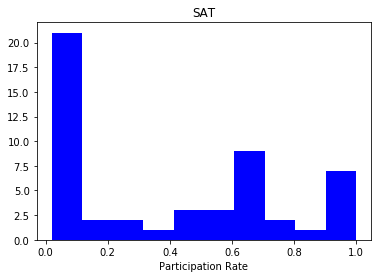

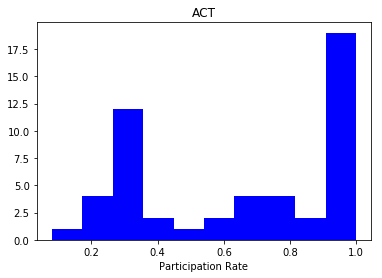

In [24]:
# Drawing histograms of the SAT and ACT participation variables

plt.figure(1)
n, bins, patches = plt.hist(clean_table['SAT Participation'], 10, facecolor='blue')
plt.xlabel('Participation Rate')
#plt.ylabel('Probability')
plt.title('SAT')
#plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
# plt.axis([40, 160, 0, 0.03])
# plt.grid(True)
plt.show()

plt.figure(2)
n, bins, patches = plt.hist(clean_table['ACT Participation'], 10, facecolor='blue')
plt.xlabel('Participation Rate')
#plt.ylabel('Probability')
plt.title('ACT')
# plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
# plt.axis([40, 160, 0, 0.03])
# plt.grid(True)
plt.show()



##### 17. Plot the Math(s) distributions from both data sets.

In [25]:
# Cleaning up outliers from the SAT Math and ACT Science columns.  Both seem to have at least one point that is
# significantly lower than the other scores.

clean_sat_math = clean_table[(clean_table)['SAT Math'] >= 300]
clean_act_science = clean_table[(clean_table)['ACT Science'] >= 15]

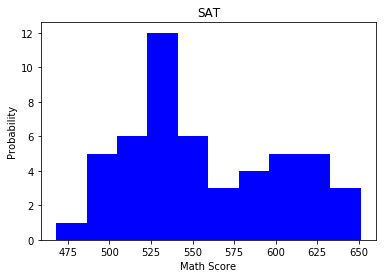

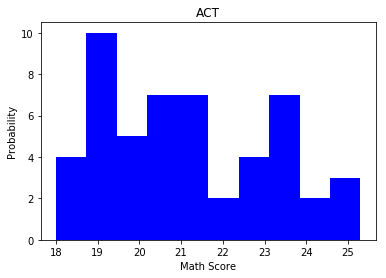

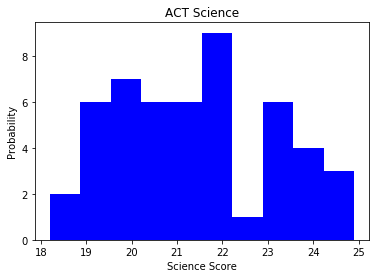

In [26]:
plt.figure(1)
n, bins, patches = plt.hist(clean_sat_math['SAT Math'], 10, facecolor='blue')
plt.xlabel('Math Score')
plt.ylabel('Probability')
plt.title('SAT')
# plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
# plt.axis([40, 160, 0, 0.03])
# plt.grid(True)
plt.show()

plt.figure(2)
n, bins, patches = plt.hist(clean_table['ACT Math'], 10, facecolor='blue')
plt.xlabel('Math Score')
plt.ylabel('Probability')
plt.title('ACT')
# plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
# plt.axis([40, 160, 0, 0.03])
# plt.grid(True)
plt.show()

plt.figure(3)
n, bins, patches = plt.hist(clean_act_science['ACT Science'], 10, facecolor='blue')
plt.xlabel('Science Score')
plt.ylabel('Probability')
plt.title('ACT Science')
# plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
# plt.axis([40, 160, 0, 0.03])
# plt.grid(True)
plt.show()

##### 18. Plot the Verbal distributions from both data sets.

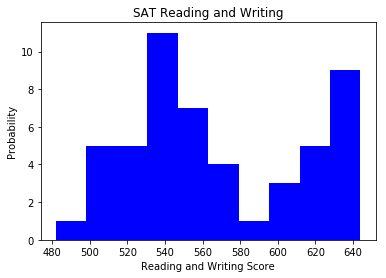

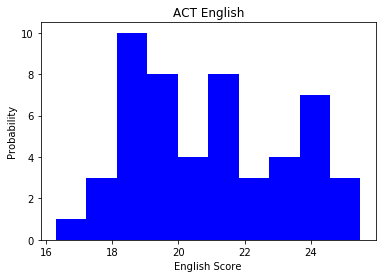

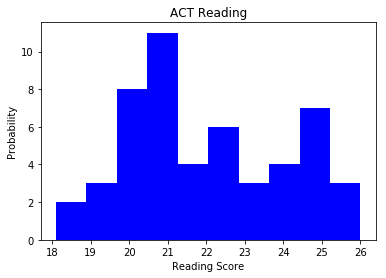

In [27]:
# f, (ax1, ax3) = plt.subplots(1,2, figsize = (14,6))


plt.figure(1)
n, bins, patches = plt.hist(clean_table['SAT Read and Write'], 10, facecolor='blue')
plt.xlabel('Reading and Writing Score')
plt.ylabel('Probability')
plt.title('SAT Reading and Writing')
# plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
# plt.axis([40, 160, 0, 0.03])
# plt.grid(True)
plt.show()

plt.figure(2)
n, bins, patches = plt.hist(clean_table['ACT English'], 10, facecolor='blue')
plt.xlabel('English Score')
plt.ylabel('Probability')
plt.title('ACT English')
# plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
# plt.axis([40, 160, 0, 0.03])
# plt.grid(True)
plt.show()

plt.figure(3)
n, bins, patches = plt.hist(clean_table['ACT Reading'], 10, facecolor='blue')
plt.xlabel('Reading Score')
plt.ylabel('Probability')
plt.title('ACT Reading')
# plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
# plt.axis([40, 160, 0, 0.03])
# plt.grid(True)
plt.show()

##### 19. When we make assumptions about how data are distributed, what is the most common assumption?

In [28]:
# The most common assumption of how data is usually distributed is that it matches a normal distribution where
# mean = mode = median

##### 20. Does this assumption hold true for any of our columns? Which?

In [29]:
#  The ACT Science score seems to be the closest variable to achieving a normal distribution.  All of the others are
#  either positively or negatively skewed.

##### 21. Plot some scatterplots examining relationships between all variables.

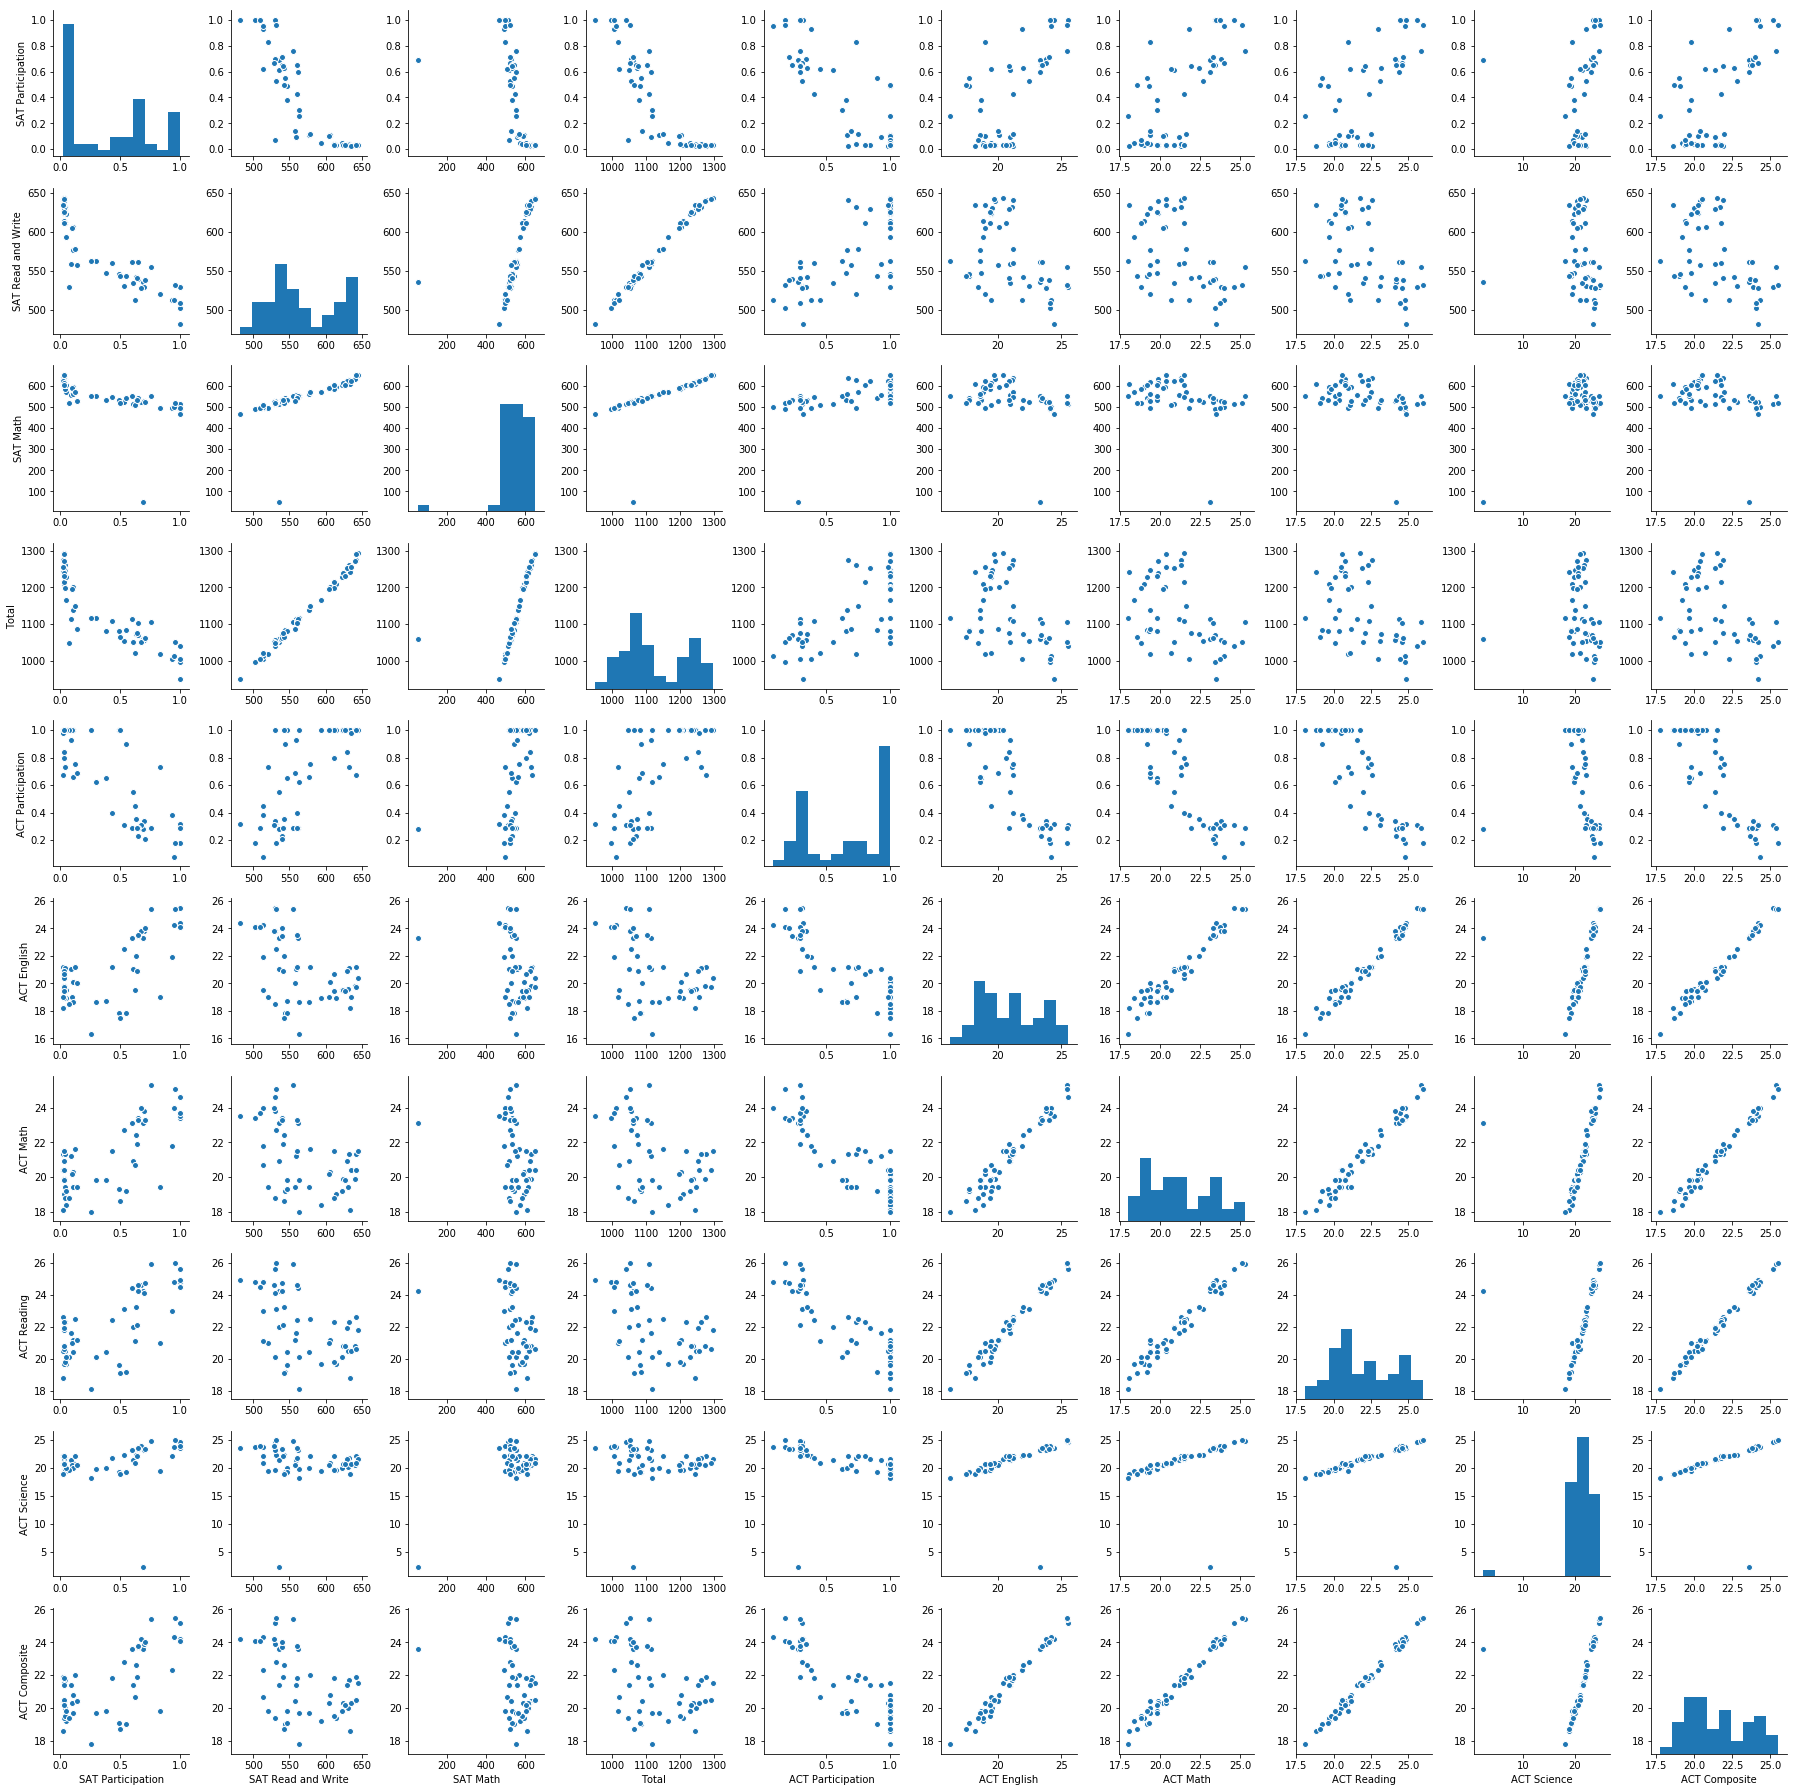

In [30]:
# The following code uses Seaborn to make scatterplots of all the data showing the relationships to each other.
    
g = sns.pairplot(clean_table)

##### 22. Are there any interesting relationships to note?

In [31]:
# SAT Reading and Writing and SAT Math have a positive linear relationship which makes some sense since you can generally infer
# that students who have high Reading and Writing scores could have a high Math score as well
# All of the ACT scores reflect this as well.  All of the individual sections have a postive linear relationship with
# all of the other scores.

##### 23. Create box plots for each variable.

C:\Users\Ed Salinas\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Text(0.5,1,'Participation Rates')

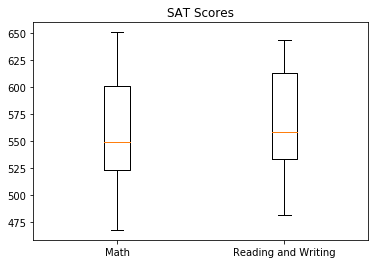

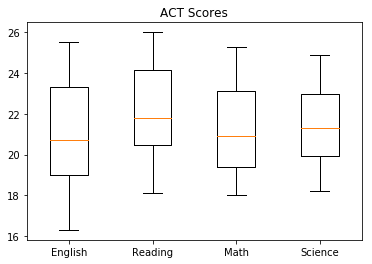

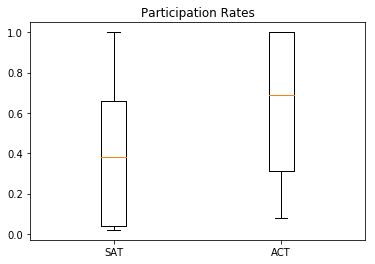

In [32]:
# Due to the scale on the y-axis for each of the different Test type variables (ACT vs SAT scores), need
# to separate out each other.  Again we use the cleaner data set that filters out outliers in SAT Math
# and ACT Science.

sat_clean_boxplots = [clean_sat_math['SAT Math'], clean_table['SAT Read and Write']]
sat_labels = ('Math', 'Reading and Writing')
plt.figure(1)
plt.boxplot(sat_clean_boxplots, labels = sat_labels)
plt.title('SAT Scores')

act_clean_boxplots = [clean_table['ACT English'], clean_table['ACT Reading'], clean_table['ACT Math'], 
                      clean_act_science['ACT Science']]
act_labels = ('English', 'Reading', 'Math', 'Science')
plt.figure(2)
plt.boxplot(act_clean_boxplots, labels = act_labels)
plt.title('ACT Scores')

participation_boxplots = [clean_table['SAT Participation'], clean_table['ACT Participation']]
part_labels = ('SAT', 'ACT')
plt.figure(3)
plt.boxplot(participation_boxplots, labels = part_labels)
plt.title('Participation Rates')



##### BONUS: Using Tableau, create a heat map for each variable using a map of the US. 

In [33]:
# Done on Tableau Public

## Step 4: Descriptive and Inferential Statistics

##### 24. Summarize each distribution. As data scientists, be sure to back up these summaries with statistics. (Hint: What are the three things we care about when describing distributions?)

In [34]:
# Mean, Standard Deviation, Shape
# For these observations, we note the following:
# Symmetric distributions are when mean = mode = median
# Negative Skew is when mean < median < mode
# Positive Skew is mode < median < mean

# SAT Participation Rate is positively skewed meaning that participation is low.
# Mode = 0.03, Median = 0.38, Mean = .398 so Mode < Median < Mean

# ACT Participation Rate is negatively skewed meaning that participation in this test is high.
# Mean = 0.653, Median = 0.69, Mode = 1 so Mean < Median < Mode

# Both SAT and ACT Math scores are positively skewed.
# ACT Math: Mode = 19.4, Median = 20.9, Mean = 21.2 so Mode < Median < Mean
# SAT Math: Mode = 541, Median = 549.5, Mean = 557.54 so Mode < Median < Mean

# ACT Science is very close to be normally distributed (a.k.a. symmetric distribution).
# Mode = 20.9, Median = 21.3, Mean = 21.4 so Mode ~ Median ~ Mean

# SAT Reading and Writing, ACT English, and ACT Reading are all positively skewed.
# SAT Reading and Writing: Mode = 530, Median = 559, Mean = 569 so Mode < Median < Mean
# ACT English: Mode = 19.5, Median = 20.7, Mean = 20.9 so Mode < Median < Mean
# ACT Reading: Mode = 20.8, Median = 21.8, Mean = 22.0 so Mode < Median < Mean

##### 25. Summarize each relationship. Be sure to back up these summaries with statistics.

In [43]:
# Most of the relationships between variables are inherently straightforward.  For example, SAT Math and SAT Reading
# and Writing have a linear relationship.  This stands to reason since students who have a high Math score will
# tend to also have a high Reading and Writing score.  The scatterplot for this relationship makes that pretty clear.
# This also holds true for the ACT scores.  Each of the ACT score variables have a positive linear relationship
# with each other so that students with high Math scores tend to have high English and Science scores.

# No other conclusions can be made from the data that has been presented to us.

##### 26. Execute a hypothesis test comparing the SAT and ACT participation rates. Use $\alpha = 0.05$. Be sure to interpret your results.

In [44]:
# Two sample t-test is the best hypothesis test to do

# H0 (null hypothesis):         μ_SAT = μ_ACT   
# HA:(alternative hypothesis):  μ_SAT ≠ μ_ACT

stats.ttest_ind(clean_table['SAT Participation'], clean_table['ACT Participation'])

# p is 0.0002 while alpha is 0.05
# Because p is less than alpha, we reject the null hypothesis and conclude that the alternative hypothesis is true.

Ttest_indResult(statistic=-3.8085778908170544, pvalue=0.00024134203698662353)

##### 27. Generate and interpret 95% confidence intervals for SAT and ACT participation rates.

In [45]:
# stats.t.interval helps us to find the confidence intervals for both the SAT and ACT participation rates.

stats.t.interval(0.95, len(clean_table['SAT Participation'])-1, loc=np.mean(clean_table['SAT Participation']),
                 scale=np.std(clean_table['SAT Participation'], ddof = 1))

# The output shows that we are 95% confident that the true mean of the SAT partipation rate falls 
# between 31.2% and 110%.

(-0.31051279537380627, 1.1065912267463553)

In [46]:
stats.t.interval(0.95, len(clean_table['ACT Participation'])-1, loc=np.mean(clean_table['ACT Participation']),
                 scale=np.std(clean_table['ACT Participation'], ddof = 1))

# The output shows that we are 95% confident that the true mean of the ACT participation rate falls
# between 0.70% and 130%.

(0.0069812093585757129, 1.2981168298571104)

##### 28. Given your answer to 26, was your answer to 27 surprising? Why?

In [47]:
# The answer is surprising, but not really surprising since the formulas used assume a normal distribution
# and neither of these data sets are normally distributed as evidenced earlier.

##### 29. Is it appropriate to generate correlation between SAT and ACT math scores? Why?

In [48]:
# It would not be appropriate to generate correlation between ACT and SAT Math scores since the score is significantly
# different between the two tests.  SAT Math scores range from 200 to 800 while ACT Math scores range from
# 1-36.  There would not be a good way to correlate to two based on how the results are reported.

# The scatterplot for ACT Math vs SAT Math also shows insignficant correlation between the two.

##### 30. Suppose we only seek to understand the relationship between SAT and ACT data in 2017. Does it make sense to conduct statistical inference given the data we have? Why?

In [49]:
# State level data is very much generalized.  We would need a more granular level analysis on the local school district or
# even county level per state.  This would indicate a much, much larger data set, but we should be able to 
# get a more detailed analysis and statistical inference from a more granular source.